In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
ratings = pd.read_csv('../Data/jesterfinal151cols.csv', delimiter=',', header=None)

*Ratings Matrix Analysys*

In [80]:
null_placeholder = 99
ratings_matrix = ratings.iloc[:,1:]
data_audit = ratings_matrix.describe().round(2).T
size = len(ratings_matrix)
missing_count = (ratings_matrix == null_placeholder).sum()
data_audit['NUM_MISSING'] = missing_count
data_audit['%_MISSING'] = np.round(missing_count/size*100, 2)
data_audit['NUM_UNIQUE'] = ratings_matrix.nunique()
data_audit['%_UNIQUE'] = np.round(ratings_matrix.nunique() / size * 100, 2)

data_audit

,count,mean,std,min,25%,50%,75%,max,NUM_MISSING,%_MISSING,NUM_UNIQUE,%_UNIQUE
1,50692.0,99.00,0.00,99.0,99.00,99.0,99.0,99.0,50692,100.00,1,0.00
2,50692.0,99.00,0.00,99.0,99.00,99.0,99.0,99.0,50692,100.00,1,0.00
3,50692.0,99.00,0.00,99.0,99.00,99.0,99.0,99.0,50692,100.00,1,0.00
4,50692.0,99.00,0.00,99.0,99.00,99.0,99.0,99.0,50692,100.00,1,0.00
5,50692.0,97.87,10.63,-10.0,99.00,99.0,99.0,99.0,50126,98.88,352,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...
146,50691.0,89.42,29.28,-10.0,99.00,99.0,99.0,99.0,45779,90.31,640,1.26
147,50691.0,80.35,38.35,-10.0,99.00,99.0,99.0,99.0,40964,80.81,641,1.26
148,50691.0,70.64,43.86,-10.0,8.16,99.0,99.0,99.0,35704,70.43,641,1.26
149,50691.0,78.10,39.84,-10.0,99.00,99.0,99.0,99.0,39723,78.36,642,1.27


**Analysys of the first column** <br/>
We see that the first column of the ratings data frame does not correspond to valid rating value (the rating values are in interval [-10, 10] ).<br/> We suppose that should be the number jokes that user has rated. (value != 99).

In [81]:
result = pd.DataFrame({
    'first_column': ratings.iloc[:, 0],  
    'valid_ratings_count': (ratings.iloc[:, 1:] != 99).sum(axis=1)
})
result

,first_column,valid_ratings_count
0,62,62
1,34,34
2,18,18
3,82,82
4,27,27
...,...,...
50687,15,15
50688,12,12
50689,14,14
50690,29,29


In [82]:
different_rows = result[result['first_column'] != result['valid_ratings_count']]
print("Different row values:")
print(different_rows)

Different row values:
       first_column  valid_ratings_count
50691            19                   45


We see a difference only in user #50691. This may be error in the data set. We will fix it and give correct valid ratings count (45) and move on with our EDA.

In [83]:
row = 50691
col = 0
valid_value = 45
ratings.iat[row, col] = valid_value

res = pd.DataFrame({
    'first_column': ratings.iloc[:, 0],  
    'valid_ratings_count': (ratings.iloc[:, 1:] != 99).sum(axis=1)
})
res

,first_column,valid_ratings_count
0,62,62
1,34,34
2,18,18
3,82,82
4,27,27
...,...,...
50687,15,15
50688,12,12
50689,14,14
50690,29,29


**Calculating sparcity**

In [84]:
total_missing = data_audit['NUM_MISSING'].sum()
matrix_size = ratings_matrix.shape[0]*ratings_matrix.shape[1]
print(f'Number of missing ratings: {total_missing}')
print(f'Total number of ratings: {matrix_size}')
print(f'% MISSING RATINGS (Sparcity): {np.round(total_missing/matrix_size*100, 2)}')


Number of missing ratings: 5874925
Total number of ratings: 7603800
% MISSING RATINGS (Sparcity): 77.26


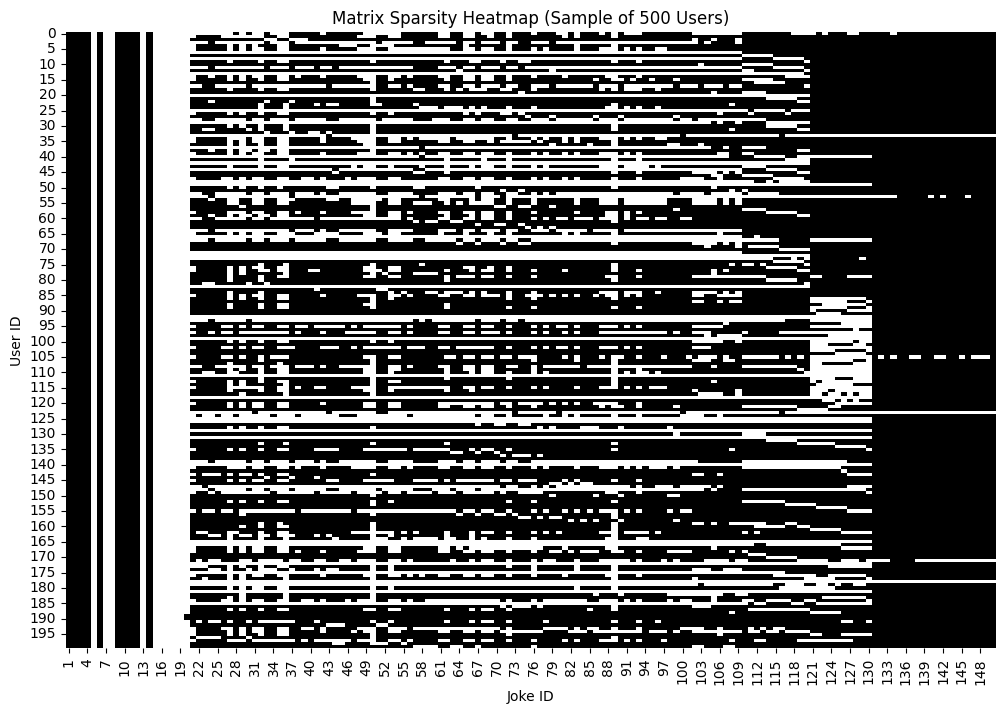

In [85]:
plt.figure(figsize=(12, 8))
sample_matrix = ratings_matrix.iloc[:200,:]
sns.heatmap(sample_matrix == 99, cbar=False, cmap='binary')
plt.title('Matrix Sparsity Heatmap (Sample of 500 Users)')
plt.xlabel('Joke ID')
plt.ylabel('User ID')
plt.savefig('../images/sparcity_heatmap.png')
plt.show()

In [86]:
valid_ratings = ratings_matrix.values[ratings_matrix.values != 99]

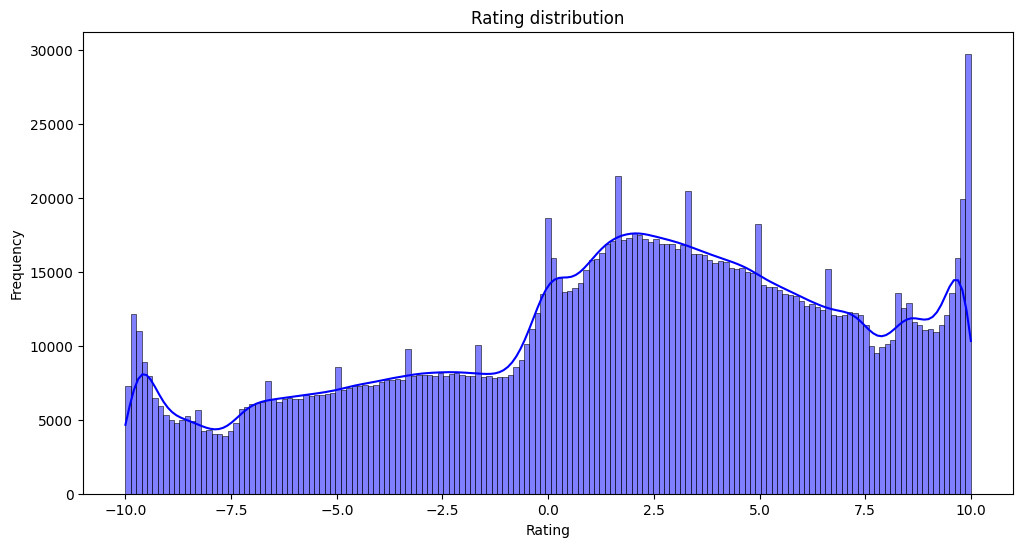

In [87]:
plt.figure(figsize=(12, 6))
sns.histplot(valid_ratings, color='blue', kde=True)
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('../images/rating_distribution.png')
plt.show()

TODO: Add comments

**Ratings per User**

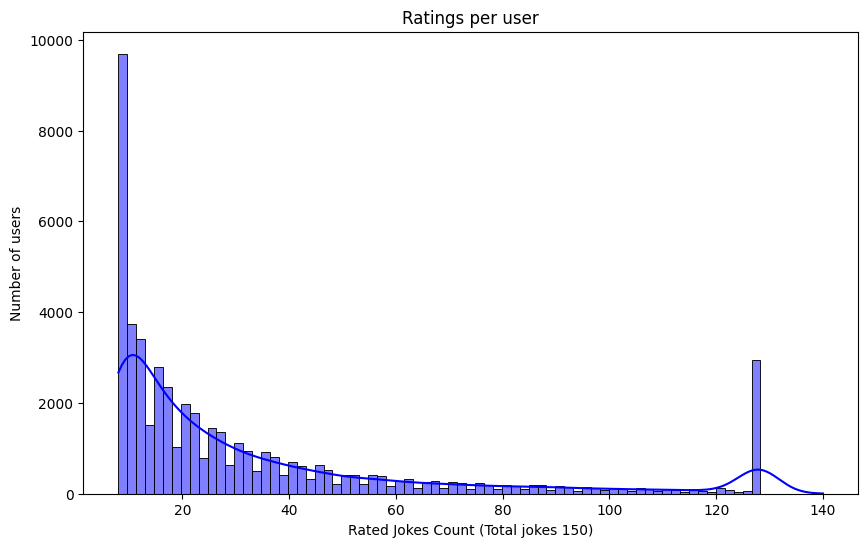

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(x=ratings[0], color='blue', kde=True)
plt.title('Ratings per user')
plt.xlabel('Rated Jokes Count (Total jokes 150)')
plt.ylabel('Number of users')
plt.savefig('../images/ratings_per_user.png')
plt.show()

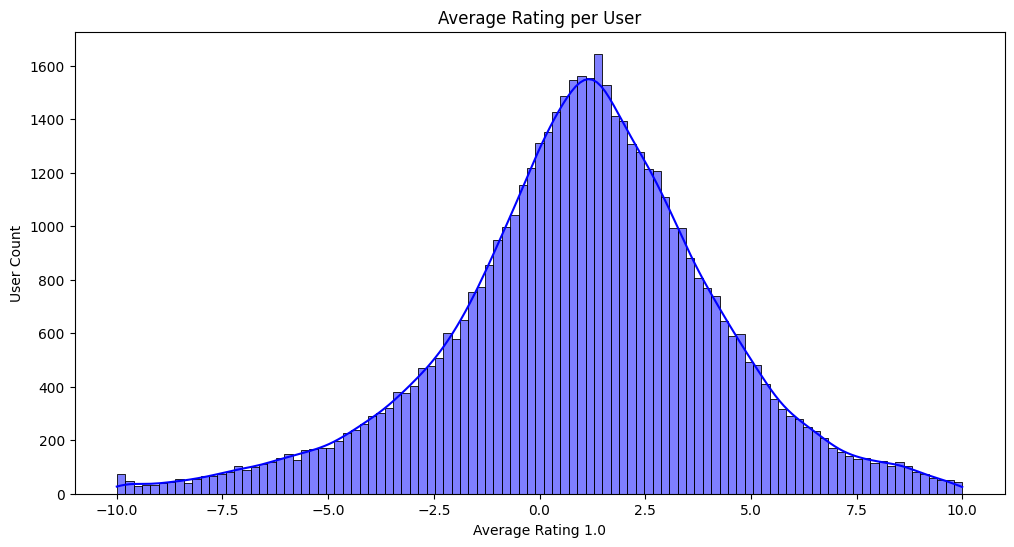

In [89]:
plt.figure(figsize=(12, 6))

user_bias = ratings_matrix.apply(lambda row: row[row != 99].mean(), axis=1)

sns.histplot(user_bias, color='blue', kde=True)
plt.title('Average Rating per User')
plt.xlabel(f'Average Rating {np.round(user_bias.mean(),2)}')
plt.ylabel('User Count')
plt.savefig('../images/avg_rating_per_user.png')
plt.show()

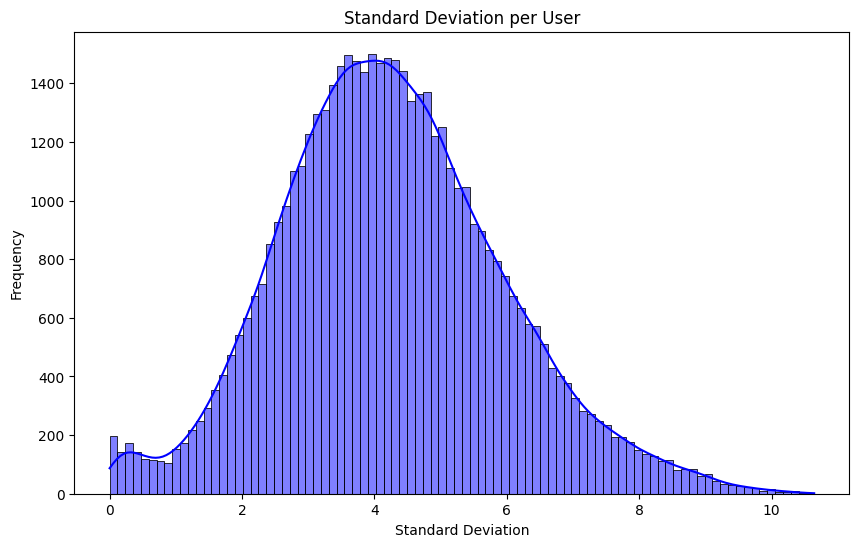

In [95]:
plt.figure(figsize=(10, 6))
user_std = ratings_matrix.apply(lambda x: x[x != 99].std(), axis=1)

sns.histplot(user_std, color='blue', kde=True)
plt.title('Standard Deviation per User')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.savefig('../images/user_std.png')
plt.show()

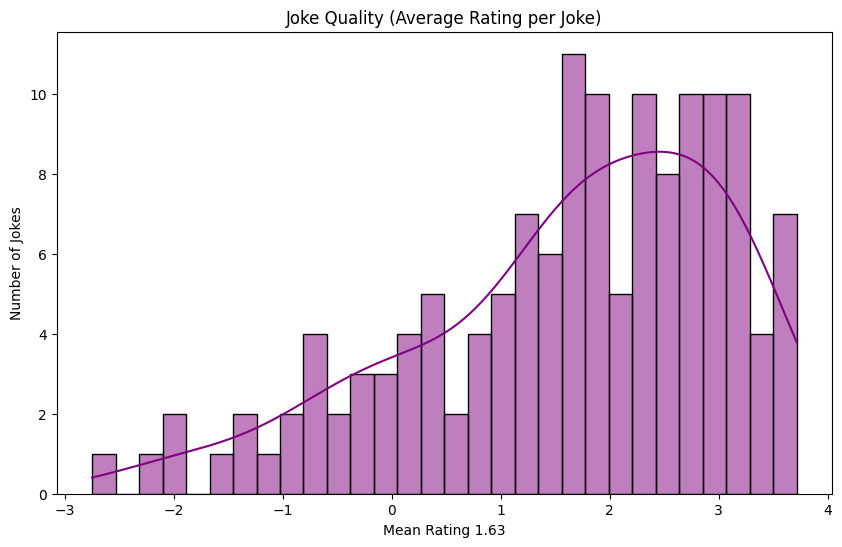

In [90]:
plt.figure(figsize=(10, 6))
joke_avg_rating = ratings_matrix.apply(lambda col: col[col != 99].mean(), axis=0)

sns.histplot(joke_avg_rating, bins=30, color='purple', kde=True)
plt.title('Joke Quality (Average Rating per Joke)')
plt.xlabel(f'Mean Rating {np.round(joke_avg_rating.mean(),2)}')
plt.ylabel('Number of Jokes')
plt.savefig('../images/avg_rating_per_joke.png')
plt.show()

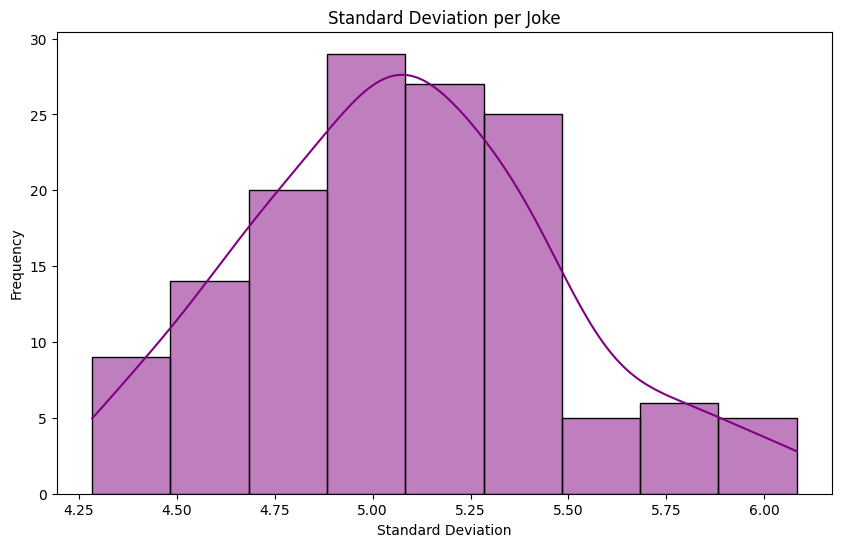

In [98]:
plt.figure(figsize=(10, 6))
jokes_std = ratings_matrix.apply(lambda x: x[x != 99].std(), axis=0)

sns.histplot(jokes_std, color='purple', kde=True)
plt.title('Standard Deviation per Joke')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.savefig('../images/jokes_std.png')
plt.show()

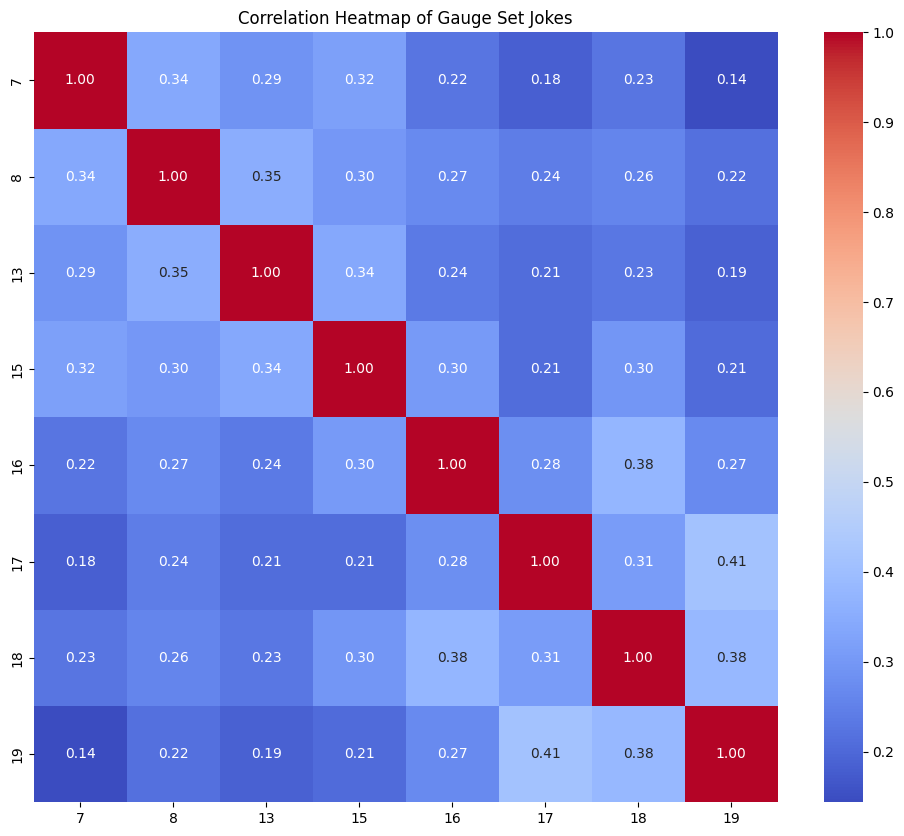

In [91]:
plt.figure(figsize=(12, 10))
gauge_cols = [7, 8, 13, 15, 16, 17, 18, 19]
gauge_corr = ratings_matrix[gauge_cols].replace(99, np.nan).corr()
sns.heatmap(gauge_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Gauge Set Jokes')
plt.savefig('../images/gauge_set_heatmap.png')
plt.show()

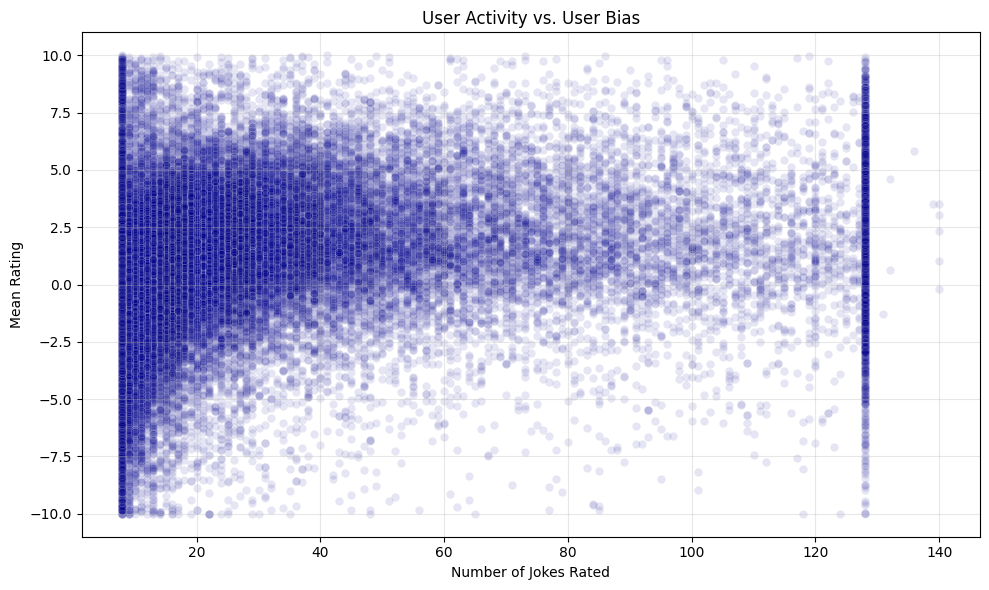

In [92]:
plt.figure(figsize=(10, 6))
user_bias = ratings_matrix.apply(lambda row: row[row != 99].mean(), axis=1)


sns.scatterplot(x=ratings[0], y=user_bias, alpha=0.1, color='darkblue')
plt.title('User Activity vs. User Bias')
plt.xlabel('Number of Jokes Rated')
plt.ylabel('Mean Rating')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../images/usr_activity_bias.png')
plt.show()

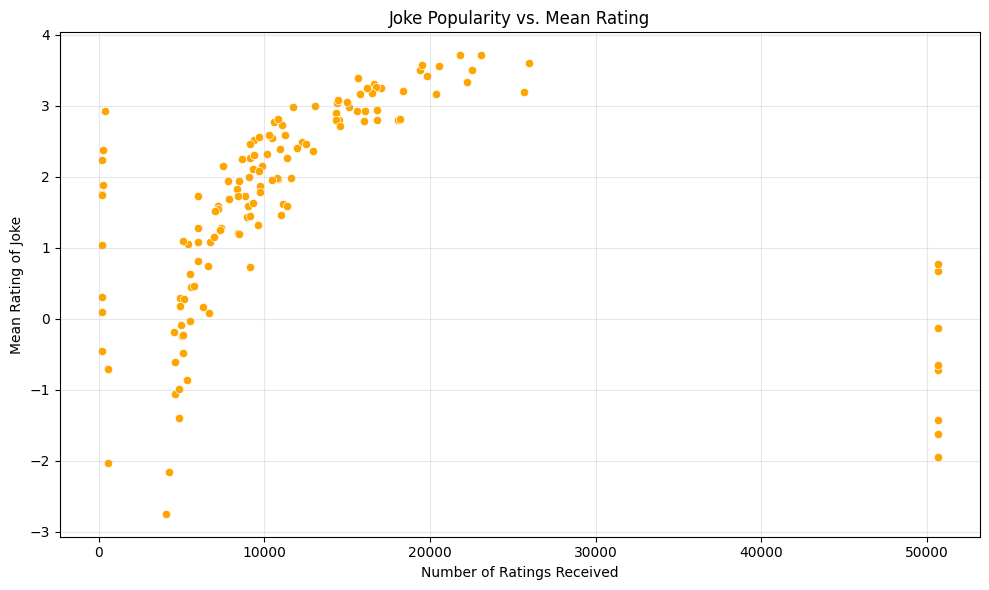

In [93]:
plt.figure(figsize=(10, 6))
joke_means = ratings_matrix.apply(lambda col: col[col != 99].mean()).sort_values(ascending=False)
joke_counts = (ratings_matrix != 99).sum().sort_values(ascending=False)

sns.scatterplot(x=joke_counts, y=joke_means, color='orange')
plt.title('Joke Popularity vs. Mean Rating')
plt.xlabel('Number of Ratings Received')
plt.ylabel('Mean Rating of Joke')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../images/jokes_popularity_rating.png')
plt.show()